# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [62]:
#Type your code here
from google.colab import drive
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [46]:
#1. Menghubungkan colab dengan google drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/submission_dicoding/coffee_sales_klasifikasi.csv'

df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,datetime,cash_type,card,money,coffee_name,year,month,cluster_pca
0,2024-03-01,2024-03-01 10:15:50.520,card,anon-0000-0000-0001,1.397345,latte,2024,3,1
1,2024-03-01,2024-03-01 12:19:22.539,card,anon-0000-0000-0002,1.397345,hot chocolate,2024,3,5
2,2024-03-01,2024-03-01 12:20:18.089,card,anon-0000-0000-0002,1.397345,hot chocolate,2024,3,5
3,2024-03-01,2024-03-01 13:46:33.006,card,anon-0000-0000-0003,-0.586911,americano,2024,3,3
4,2024-03-01,2024-03-01 13:48:14.626,card,anon-0000-0000-0004,1.397345,latte,2024,3,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3263 non-null   object 
 1   datetime     3263 non-null   object 
 2   cash_type    3263 non-null   object 
 3   card         3263 non-null   object 
 4   money        3263 non-null   float64
 5   coffee_name  3263 non-null   object 
 6   year         3263 non-null   int64  
 7   month        3263 non-null   int64  
 8   cluster_pca  3263 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 229.6+ KB


In [49]:
#2. Pisahkan kolom kategorikal dan numerik
categorical_columns = ['card', 'coffee_name', 'cash_type']  # Gantilah sesuai nama kolom kategorikal di dataset kamu
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

#3. Lakukan Encoding untuk Kolom Kategorikal
encoder_card = LabelEncoder()
df['card'] = encoder_card.fit_transform(df['card'])

encoder_coffee = LabelEncoder()
df['coffee_name'] = encoder_coffee.fit_transform(df['coffee_name'])

#4. Cek apakah kolom cash_type memiliki lebih dari satu kategori
if df['cash_type'].nunique() > 1:
    encoder_cash = LabelEncoder()
    df['cash_type'] = encoder_cash.fit_transform(df['cash_type'])
else:
    print("Kolom 'cash_type' hanya memiliki satu kategori, tidak perlu encoding.")

In [50]:
#6. Mengubah kolom 'cluster_pca' menjadi tipe data object
df['cluster_pca'] = df['cluster_pca'].astype('object')

# Cek tipe data untuk memastikan perubahan
print(df.dtypes)


date            object
datetime        object
cash_type        int64
card             int64
money          float64
coffee_name      int64
year             int64
month            int64
cluster_pca     object
dtype: object


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [58]:
#7. Normalisasi hanya pada kolom numerik
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns  # Kolom numerik dalam X
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Gabungkan kembali kolom target 'cluster_pca' dengan X
X['cluster_pca'] = y

# Tampilkan hasil normalisasi
print(X.head())
X.info()

   cash_type      card     money  coffee_name      year     month  cluster_pca
0  -0.167452 -1.296015  1.397345     1.447779 -0.460065 -1.101979            1
1  -0.167452 -1.293484  1.397345     1.062201 -0.460065 -1.101979            5
2  -0.167452 -1.293484  1.397345     1.062201 -0.460065 -1.101979            5
3  -0.167452 -1.290954 -0.586911    -1.251268 -0.460065 -1.101979            3
4  -0.167452 -1.288423  1.397345     1.447779 -0.460065 -1.101979            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cash_type    3263 non-null   float64
 1   card         3263 non-null   float64
 2   money        3263 non-null   float64
 3   coffee_name  3263 non-null   float64
 4   year         3263 non-null   float64
 5   month        3263 non-null   float64
 6   cluster_pca  3263 non-null   int64  
dtypes: float64(6), int64(1)
memory usage:

In [59]:
#8. Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [60]:
# Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)

# Latih model dengan data latih
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [61]:
# Inisialisasi model Decision Tree
model_tree = DecisionTreeClassifier(random_state=42)

# Latih model dengan data latih
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi pada data latih: 1.0000
Akurasi pada data uji: 1.0000

Classification Report untuk data uji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        94
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        18

    accuracy                           1.00       653
   macro avg       1.00      1.00      1.00       653
weighted avg       1.00      1.00      1.00       653



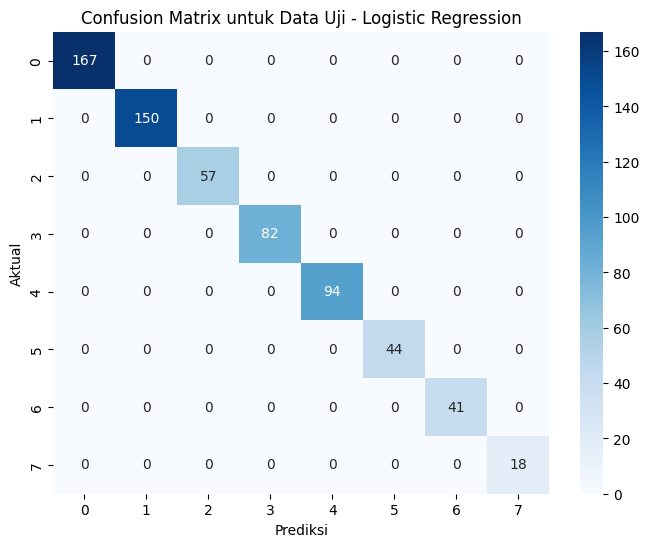


Confusion Matrix Detail:
[[167   0   0   0   0   0   0   0]
 [  0 150   0   0   0   0   0   0]
 [  0   0  57   0   0   0   0   0]
 [  0   0   0  82   0   0   0   0]
 [  0   0   0   0  94   0   0   0]
 [  0   0   0   0   0  44   0   0]
 [  0   0   0   0   0   0  41   0]
 [  0   0   0   0   0   0   0  18]]

Model tidak mengalami overfitting atau underfitting secara jelas: Akurasi pada data latih dan uji serupa.


In [73]:
# Prediksi menggunakan model yang sudah dilatih dengan Logistic Regression
y_pred_train = model.predict(X_train)  # Prediksi untuk data latih
y_pred_test = model.predict(X_test)    # Prediksi untuk data uji

# Evaluasi model

# Akurasi pada data latih
accuracy_train = accuracy_score(y_train, y_pred_train)
# Akurasi pada data uji
accuracy_test = accuracy_score(y_test, y_pred_test)

# Menampilkan hasil evaluasi
print(f"Akurasi pada data latih: {accuracy_train:.4f}")
print(f"Akurasi pada data uji: {accuracy_test:.4f}")

# Laporan klasifikasi untuk data uji
print("\nClassification Report untuk data uji:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix untuk data uji
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Menampilkan Confusion Matrix dalam bentuk visual menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix untuk Data Uji - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Menampilkan detail confusion matrix
print("\nConfusion Matrix Detail:")
print(conf_matrix)

# Analisis overfitting atau underfitting
if accuracy_train > accuracy_test:
    print("\nModel mungkin mengalami Overfitting: Akurasi pada data latih lebih tinggi daripada data uji.")
elif accuracy_train < accuracy_test:
    print("\nModel mungkin mengalami Underfitting: Akurasi pada data latih lebih rendah daripada data uji.")
else:
    print("\nModel tidak mengalami overfitting atau underfitting secara jelas: Akurasi pada data latih dan uji serupa.")


Akurasi pada data latih (Decision Tree): 1.0000
Akurasi pada data uji (Decision Tree): 1.0000

Classification Report untuk data uji (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        94
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        18

    accuracy                           1.00       653
   macro avg       1.00      1.00      1.00       653
weighted avg       1.00      1.00      1.00       653



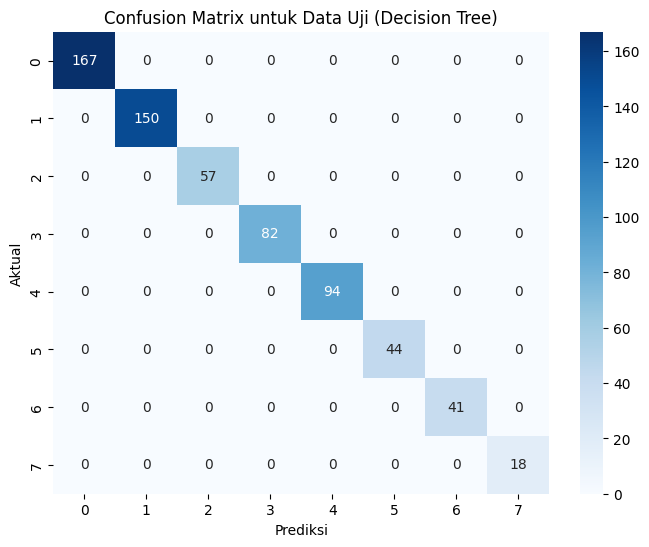


Confusion Matrix Detail (Decision Tree):
[[167   0   0   0   0   0   0   0]
 [  0 150   0   0   0   0   0   0]
 [  0   0  57   0   0   0   0   0]
 [  0   0   0  82   0   0   0   0]
 [  0   0   0   0  94   0   0   0]
 [  0   0   0   0   0  44   0   0]
 [  0   0   0   0   0   0  41   0]
 [  0   0   0   0   0   0   0  18]]

Model Decision Tree tidak mengalami overfitting atau underfitting secara jelas: Akurasi pada data latih dan uji serupa.


In [74]:
# Prediksi menggunakan model yang sudah dilatih dengan Decision Tree
y_pred_train_tree = model_tree.predict(X_train)  # Prediksi untuk data latih
y_pred_test_tree = model_tree.predict(X_test)    # Prediksi untuk data uji

# Evaluasi model

# Akurasi pada data latih
accuracy_train_tree = accuracy_score(y_train, y_pred_train_tree)
# Akurasi pada data uji
accuracy_test_tree = accuracy_score(y_test, y_pred_test_tree)

# Menampilkan hasil evaluasi
print(f"Akurasi pada data latih (Decision Tree): {accuracy_train_tree:.4f}")
print(f"Akurasi pada data uji (Decision Tree): {accuracy_test_tree:.4f}")

# Laporan klasifikasi untuk data uji (Decision Tree)
print("\nClassification Report untuk data uji (Decision Tree):\n", classification_report(y_test, y_pred_test_tree))

# Confusion Matrix untuk data uji (Decision Tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_test_tree)

# Menampilkan Confusion Matrix dalam bentuk visual menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix untuk Data Uji (Decision Tree)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Menampilkan detail confusion matrix (Decision Tree)
print("\nConfusion Matrix Detail (Decision Tree):")
print(conf_matrix_tree)

# Analisis overfitting atau underfitting (Decision Tree)
if accuracy_train_tree > accuracy_test_tree:
    print("\nModel Decision Tree mungkin mengalami Overfitting: Akurasi pada data latih lebih tinggi daripada data uji.")
elif accuracy_train_tree < accuracy_test_tree:
    print("\nModel Decision Tree mungkin mengalami Underfitting: Akurasi pada data latih lebih rendah daripada data uji.")
else:
    print("\nModel Decision Tree tidak mengalami overfitting atau underfitting secara jelas: Akurasi pada data latih dan uji serupa.")


## Hasil Evaluasi Model

### 1. Logistic Regression

- **Akurasi pada Data Latih**: 1.0
- **Akurasi pada Data Uji**: 1.0


---

### 2. Decision Tree

- **Akurasi pada Data Latih**: 1.0000
- **Akurasi pada Data Uji**: 1.0000


---

### **Perbandingan Hasil:**

- **Akurasi**: Kedua model, yaitu **Logistic Regression** dan **Decision Tree**, menunjukkan akurasi sempurna yaitu **1.0** pada data latih dan data uji. Ini menunjukkan bahwa model berhasil mempelajari pola dengan sangat baik pada dataset ini.

- **Precision, Recall, F1-Score**: Pada kedua model, **precision**, **recall**, dan **f1-score** untuk setiap kelas adalah **1.00**, yang menunjukkan bahwa model tidak membuat kesalahan dalam memprediksi setiap kelas.

- **Kesimpulan**: Kedua algoritma memberikan hasil yang sangat baik, dengan kinerja yang identik dalam hal akurasi dan metrik evaluasi lainnya. Meskipun keduanya memberikan hasil yang sempurna, keputusan untuk memilih salah satu model bisa didasarkan pada kriteria lain seperti interpretabilitas atau kompleksitas model. Decision Tree lebih mudah diinterpretasikan secara visual, sementara Logistic Regression lebih sering digunakan pada masalah klasifikasi linier.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1. **Perbandingan Hasil Evaluasi Algortima Decision Tree dan Logistic Regression**
Pada evaluasi model klasifikasi ini, saya menggunakan dua algoritma, yaitu **Logistic Regression** dan **Decision Tree**. Kedua model ini memberikan hasil yang sangat baik baik pada data latih maupun data uji, dengan akurasi sempurna.

- **Logistic Regression:**
  - Akurasi pada data latih: 1.0000
  - Akurasi pada data uji: 1.0000
  - **Classification Report** menunjukkan precision, recall, dan f1-score yang sangat baik untuk setiap kelas, menunjukkan performa yang baik di semua metrik.

- **Decision Tree:**
  - Akurasi pada data latih: 1.0000
  - Akurasi pada data uji: 1.0000
  - **Classification Report** menunjukkan hasil yang hampir identik dengan Logistic Regression, dengan nilai precision, recall, dan f1-score yang tinggi untuk setiap kelas.

Meskipun **hyperparameter tuning** tidak diterapkan pada kedua model, hasil evaluasi menunjukkan bahwa kedua model ini sangat baik dalam mengklasifikasikan data.

### 2. **Identifikasi Kelemahan Model**
Meski kedua model menunjukkan hasil yang sempurna pada akurasi, ada beberapa poin yang perlu dicermati lebih lanjut:

- **Precision atau Recall Rendah untuk Kelas Tertentu:**
  - Tidak ada yang rendah, semua model memiliki Precision, Recall dan F1-score yang sempurna

- **Overfitting atau Underfitting:**
  - Berdasarkan analisis yang dilakukan, **model tidak mengalami overfitting** atau **underfitting**. Kedua model menunjukkan akurasi yang sangat baik pada data latih maupun data uji, dengan nilai akurasi yang hampir identik. Ini menunjukkan bahwa kedua model ini mampu menggeneralisasi dengan baik ke data yang tidak terlihat (data uji) tanpa kehilangan performa.
  - **Overfitting** biasanya terjadi jika model memiliki performa yang sangat baik pada data latih, tetapi buruk pada data uji. Dalam hal ini, kedua model menunjukkan performa yang konsisten, yang mengindikasikan model tidak terlalu "terlatih" pada data latih hingga mengorbankan kemampuan generalisasi pada data uji.
  - **Underfitting** adalah kondisi di mana model gagal untuk menangkap pola dalam data, yang biasanya terlihat ketika akurasi data latih dan uji rendah. Namun, karena kedua model memberikan akurasi 1.0000 pada data latih dan uji, **underfitting** juga tidak menjadi masalah di sini.

### 3. **Rekomendasi Tindakan Lanjutan**
Jika hasil evaluasi model belum memuaskan atau ada kelemahan yang teridentifikasi, beberapa langkah lanjutan yang dapat dilakukan antara lain:

- **Mengumpulkan Data Tambahan:**
  - Untuk menghindari masalah **imbalansi kelas**, dapat dipertimbangkan untuk mengumpulkan lebih banyak data dari kelas yang kurang terwakili.
  - Data tambahan yang lebih beragam dapat membantu meningkatkan performa model dalam mengklasifikasikan kelas-kelas yang jarang atau kurang terwakili.

- **Mencoba Algoritma Lain:**
  - Jika hasil model saat ini masih belum memadai atau jika terdapat kompleksitas lebih dalam data, cobalah algoritma lain yang lebih robust seperti **Random Forest**, **Support Vector Machine (SVM)**, atau **Gradient Boosting**.
  - Setiap algoritma memiliki keunggulan dan keterbatasan masing-masing dalam menangani tipe data tertentu. Oleh karena itu, mencoba beberapa algoritma dapat memberikan hasil yang lebih baik.

- **Evaluasi lebih lanjut dengan Cross-Validation:**
  - Penggunaan **cross-validation** bisa memberikan gambaran yang lebih akurat mengenai performa model pada berbagai subset data dan mengurangi potensi bias yang muncul dari pembagian data latih dan uji yang tidak representatif.

Dengan langkah-langkah ini, kita dapat memastikan model yang lebih robust, yang tidak hanya bekerja baik pada data yang terlihat (data latih), tetapi juga pada data yang belum pernah dilihat sebelumnya (data uji).

---

### Catatan:
- Dalam analisis ini, kita menyimpulkan bahwa model tidak mengalami **overfitting** atau **underfitting** karena akurasi yang sangat baik pada data latih dan uji yang hampir identik.
